# Comparison and application of Bayesian Neural Networks and Classical Neural Networks

In this notebook we perform a comparison of a Bayesian Neural Network (BNN) and a Neural Network (NN) to solve a regression task involving the prediction of wine quality using its attributes and characteristics. The dataset employed for this analysis is the *wine_quality* dataset from Tensorflow.

**Dataset description**: https://www.tensorflow.org/datasets/catalog/wine_quality.

**Authors**: Sara Bardají, Sergi Bech and David Rosado.


In [ ]:
# Needed imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt

## Download and visualize the data

In [ ]:
# Load the Wine Quality dataset using TFDS
dataset = tfds.load('wine_quality', split='train')

# Convert the dataset to a Pandas DataFrame
df = tfds.as_dataframe(dataset)

# Rename columns to remove the "features/" prefix
df.rename(columns=lambda x: x.split("/")[-1], inplace=True)

# Print the DataFrame
df.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


## Exploratory Data Analysis

In [ ]:
df.info()
#We can see that all variables are float and int

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               4898 non-null   float32
 1   chlorides             4898 non-null   float32
 2   citric acid           4898 non-null   float32
 3   density               4898 non-null   float32
 4   fixed acidity         4898 non-null   float32
 5   free sulfur dioxide   4898 non-null   float32
 6   pH                    4898 non-null   float32
 7   residual sugar        4898 non-null   float32
 8   sulphates             4898 non-null   float64
 9   total sulfur dioxide  4898 non-null   float32
 10  volatile acidity      4898 non-null   float32
 11  quality               4898 non-null   int32  
dtypes: float32(10), float64(1), int32(1)
memory usage: 248.9 KB


In [ ]:
df.describe()
#See some first order and second order staistics of each column

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514268,0.045772,0.334192,0.994027,6.854788,35.308086,3.188267,6.391415,0.489847,138.360657,0.278241,5.877909
std,1.230621,0.021848,0.121020,0.002991,0.843868,17.007137,0.151001,5.072058,0.114126,42.498066,0.100795,0.885639
min,8.000000,0.009000,0.000000,0.987110,3.800000,2.000000,2.720000,0.600000,0.220000,9.000000,0.080000,3.000000
25%,9.500000,0.036000,0.270000,0.991723,6.300000,23.000000,3.090000,1.700000,0.410000,108.000000,0.210000,5.000000
50%,10.400000,0.043000,0.320000,0.993740,6.800000,34.000000,3.180000,5.200000,0.470000,134.000000,0.260000,6.000000
75%,11.400000,0.050000,0.390000,0.996100,7.300000,46.000000,3.280000,9.900000,0.550000,167.000000,0.320000,6.000000
max,14.200000,0.346000,1.660000,1.038980,14.200000,289.000000,3.820000,65.800003,1.080000,440.000000,1.100000,9.000000


In [ ]:
#Check for missing values:
df.isnull().sum()

alcohol                 0
chlorides               0
citric acid             0
density                 0
fixed acidity           0
free sulfur dioxide     0
pH                      0
residual sugar          0
sulphates               0
total sulfur dioxide    0
volatile acidity        0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

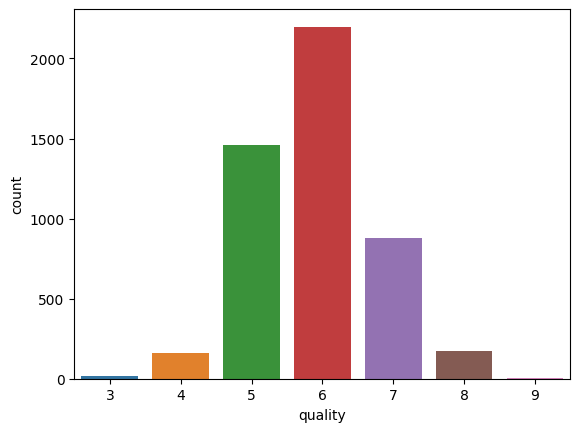

In [ ]:
sns.countplot(x='quality',data=df)
#Quality distribution

<Axes: >

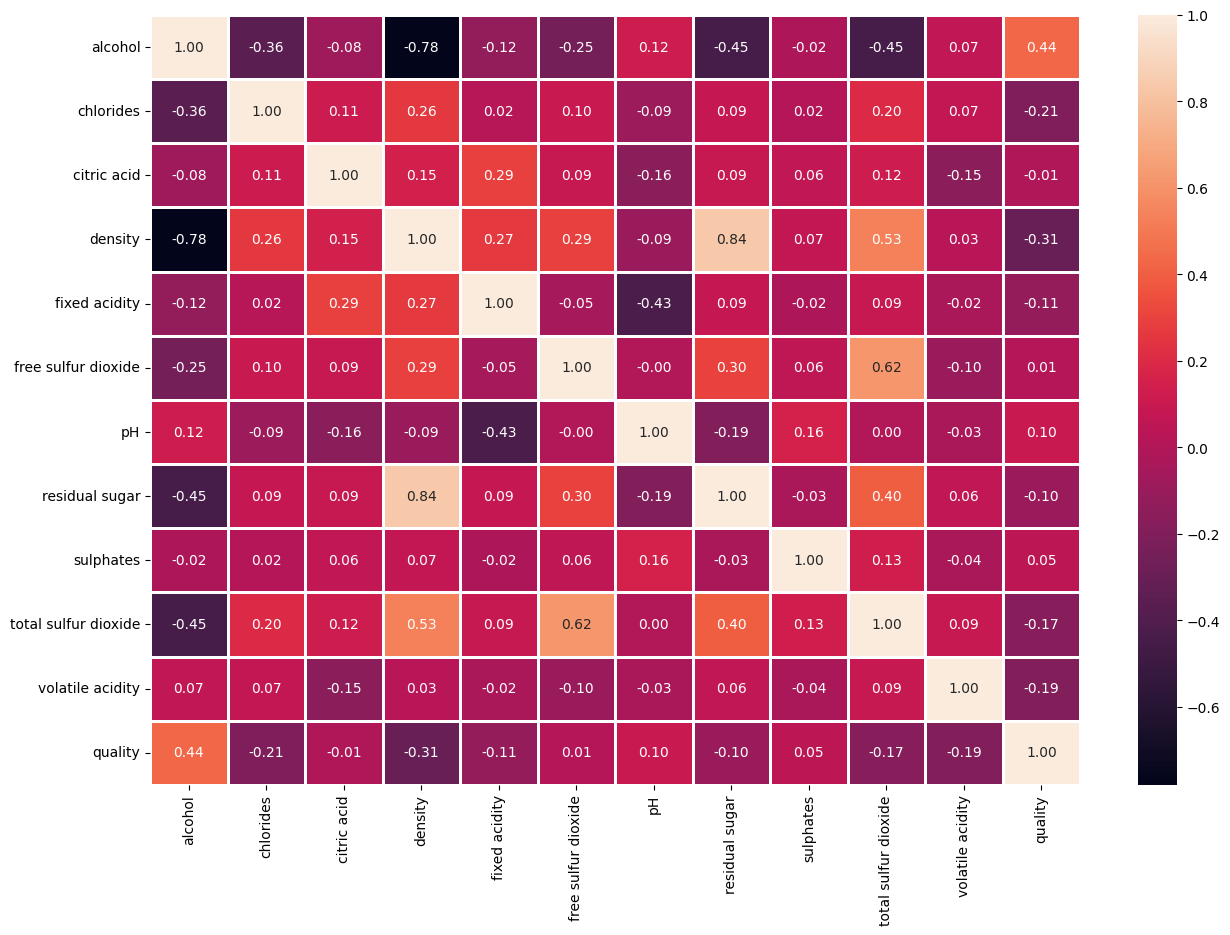

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
#Let's see the correlations of the variables


  From the plot we can see that:


*  The quality of wine is positively correlated with its alcohol content.
*  The pH value of wine shows a negative correlation with fixed acidity.
*  Fixed acidity exhibit a weak correlation with citric acid in wine.
*  Density is negative correlated to alcohol.

<Axes: xlabel='quality', ylabel='alcohol'>

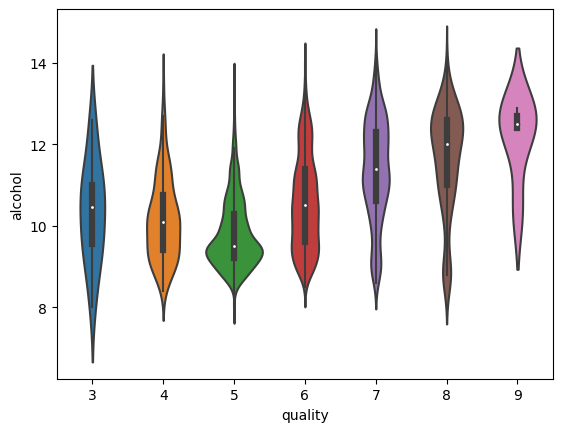

In [ ]:
sns.violinplot(x="quality",y="alcohol",data=df)

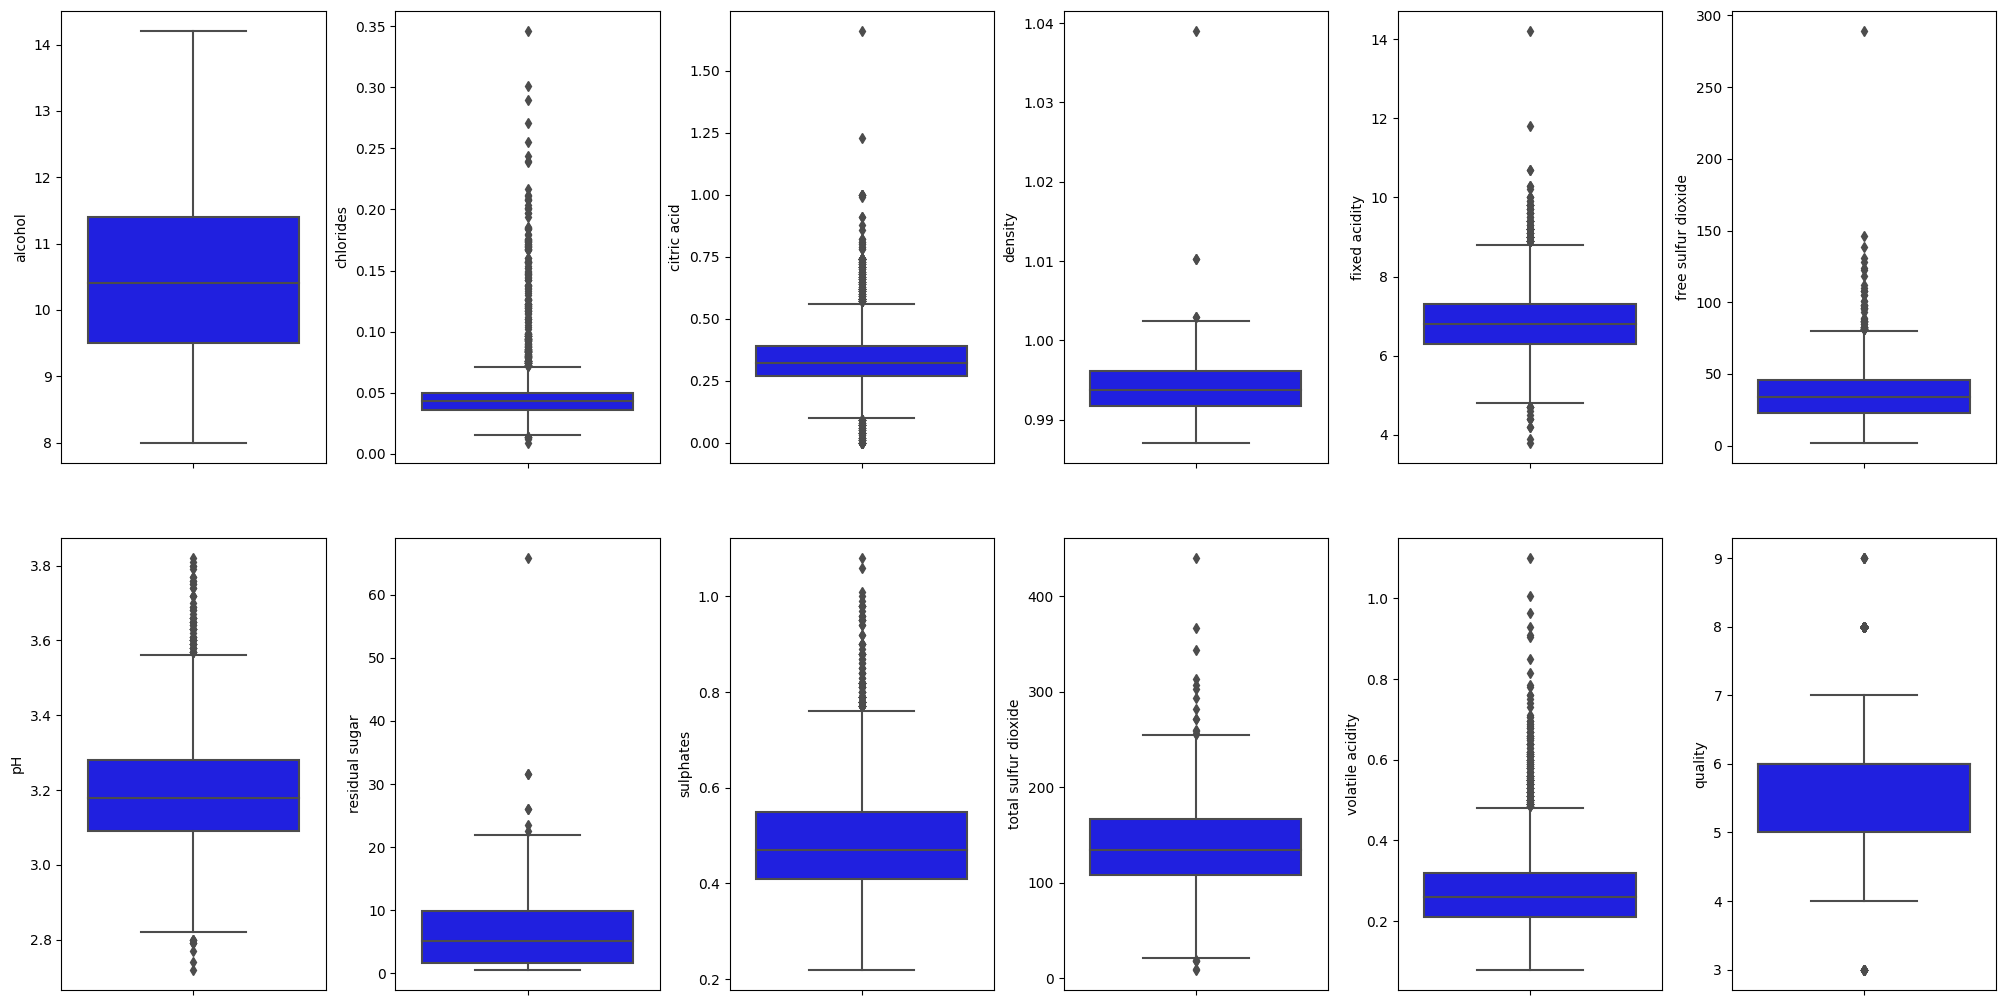

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
# We can see that data have some outliers in some of the columns

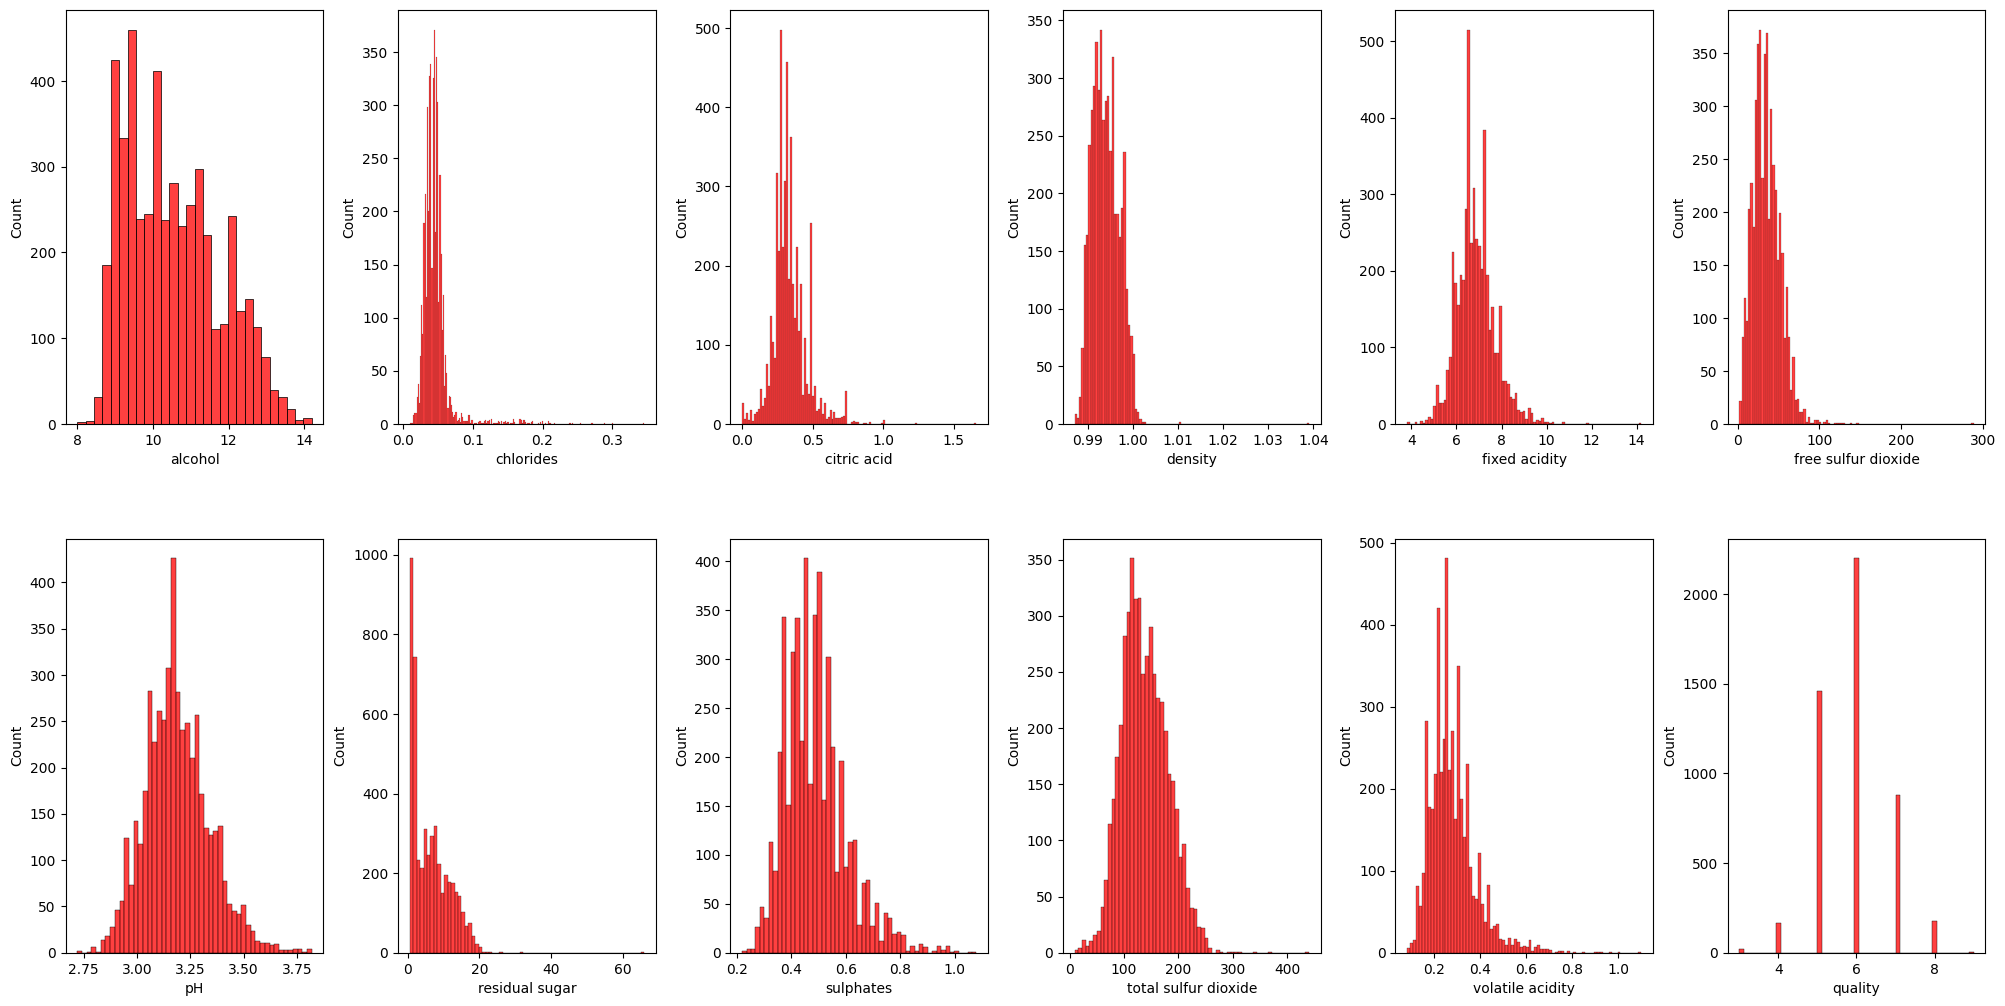

In [ ]:
# Create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, color='r', ax=ax[index])  # Use histplot
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


## Models

As said before, let us first train a classical NN and later on, a BNN. Before starting, let us prepare the data, create the train/test sets, and separate the features of the target.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

X_train = train_data.drop(columns='quality')
y_train = train_data['quality']

X_test = test_data.drop(columns='quality')
y_test = test_data['quality']

Train set shape: (3918, 12)
Test set shape: (980, 12)


### Standard Neural Network

We will employ an MLP model comprising two hidden layers, each consisting of 8 units, and utilizing the ReLU activation function.



In [ ]:
def create_mlp_model():
    """
    Create an MLP model.

    Returns:
        model (keras.Model): The MLP model.
    """
    inputs = keras.Input(shape=(11,))  # Assuming the Wine dataset has 11 input features

   # features = layers.BatchNormalization()(inputs)  # Apply batch normalization

    # Create hidden layers with a specific number of units and activation function
    features = layers.Dense(8, activation="relu")(inputs)
    features = layers.Dense(8, activation="relu")(features)

    # The output layer produces a single point estimate with a linear activation
    outputs = layers.Dense(units=1, activation="linear")(features)

    model = keras.Model(inputs=inputs, outputs=outputs)  # Create the model
    return model

#### Train

In [ ]:
# Create the MLP model
mlp_model = create_mlp_model()

# Compile the model
mlp_model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model using the training set
mlp_model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = mlp_model.evaluate(X_test, y_test)
print("Test loss:", loss)

Epoch 1/500
123/123 [==============================] - 2s 5ms/step - loss: 17.6237 - val_loss: 3.8504
Epoch 2/500
123/123 [==============================] - 0s 2ms/step - loss: 3.5349 - val_loss: 3.4740
Epoch 3/500
123/123 [==============================] - 0s 2ms/step - loss: 3.1200 - val_loss: 3.0368
Epoch 4/500
123/123 [==============================] - 0s 2ms/step - loss: 2.6725 - val_loss: 2.5814
Epoch 5/500
123/123 [==============================] - 0s 3ms/step - loss: 2.2197 - val_loss: 2.1253
Epoch 6/500
123/123 [==============================] - 0s 2ms/step - loss: 1.7806 - val_loss: 1.7195
Epoch 7/500
123/123 [==============================] - 0s 2ms/step - loss: 1.3840 - val_loss: 1.3569
Epoch 8/500
123/123 [==============================] - 0s 2ms/step - loss: 1.0812 - val_loss: 1.0983
Epoch 9/500
123/123 [==============================] - 0s 2ms/step - loss: 0.8558 - val_loss: 0.9076
Epoch 10/500
123/123 [==============================] - 0s 3ms/step - loss: 0.7298 - val_l

#### Predictions

In [ ]:
# Calculate the predicted values
predictions = mlp_model.predict(X_test[:10])

# Print the predictions and ground truth
for i in range(10):
    predicted_value = round(predictions[i][0], 2)
    print(f"Predicted: {predicted_value:.2f}, Actual: {y_test.iloc[i]}")

1/1 [==============================] - 0s 135ms/step
Predicted: 6.27, Actual: 6
Predicted: 5.39, Actual: 6
Predicted: 4.98, Actual: 4
Predicted: 5.63, Actual: 5
Predicted: 6.81, Actual: 7
Predicted: 6.24, Actual: 6
Predicted: 5.80, Actual: 7
Predicted: 5.18, Actual: 5
Predicted: 6.75, Actual: 7
Predicted: 5.78, Actual: 6


### Bayesian Neural Network

Let us try to perform the same analysis but now using a BNN.

#### Variational Inference: 
Variational inference is a technique used to approximate the posterior distribution of the weights in the network. In the code, we define the prior and posterior weight distributions, and then use the tfp.layers.DenseVariational layer to incorporate weight uncertainty and perform variational inference during training. The kl_weight parameter controls the strength of the Kullback-Leibler divergence term, which balances the trade-off between fitting the data and staying close to the prior distribution. By using the tfp.layers.DenseVariational layer, we are able to capture uncertainty in the model's predictions and obtain a distribution over the model's parameters.


#### Prior and Posterior definition

In [ ]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    """
    Define the prior weight distribution.

    Args:
        kernel_size (int): Size of the kernel.
        bias_size (int): Size of the bias.
        dtype (tf.dtypes.DType, optional): Data type. Defaults to None.

    Returns:
        prior_model (keras.Sequential): The prior weight distribution model.
    """
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    """
    Define the variational posterior weight distribution.

    Args:
        kernel_size (int): Size of the kernel.
        bias_size (int): Size of the bias.
        dtype (tf.dtypes.DType, optional): Data type. Defaults to None.

    Returns:
        posterior_model (keras.Sequential): The variational posterior weight distribution model.
    """
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

#### BNN model creation

In [ ]:
def create_bnn_model(train_size):

    inputs = keras.Input(shape=(11,))  # Assuming the Wine dataset has 11 input features

    features = layers.BatchNormalization()(inputs)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in [8,8]:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # Create a probabilistic output (Normal distribution), and use the `Dense` layer
    # to produce the parameters of the distribution.
    # We set units=2 to learn both the mean and the variance of the Normal distribution.
    distribution_params = layers.Dense(units=2)(features)
    outputs = tfp.layers.IndependentNormal(1)(distribution_params)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

#### Train

In [ ]:
def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)

num_epochs = 500
bnn_model = create_bnn_model(X_train.shape[0])

# Compile the model
bnn_model.compile(optimizer="adam", loss=negative_loglikelihood)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Train the model using the training set
bnn_model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = bnn_model.evaluate(X_test, y_test)
print("Test loss:", loss)

Epoch 1/500
123/123 [==============================] - 5s 11ms/step - loss: 19.3908 - val_loss: 12.9555
Epoch 2/500
123/123 [==============================] - 0s 3ms/step - loss: 9.3302 - val_loss: 7.0816
Epoch 3/500
123/123 [==============================] - 0s 3ms/step - loss: 5.8976 - val_loss: 4.8933
Epoch 4/500
123/123 [==============================] - 0s 4ms/step - loss: 4.4901 - val_loss: 4.0069
Epoch 5/500
123/123 [==============================] - 0s 4ms/step - loss: 3.5019 - val_loss: 3.1151
Epoch 6/500
123/123 [==============================] - 0s 4ms/step - loss: 2.8654 - val_loss: 2.8247
Epoch 7/500
123/123 [==============================] - 0s 3ms/step - loss: 2.5771 - val_loss: 2.4283
Epoch 8/500
123/123 [==============================] - 1s 6ms/step - loss: 2.3229 - val_loss: 2.2053
Epoch 9/500
123/123 [==============================] - 1s 7ms/step - loss: 2.0950 - val_loss: 2.0643
Epoch 10/500
123/123 [==============================] - 1s 6ms/step - loss: 2.0219 - val

#### Predictions

In [ ]:
prediction_distribution = bnn_model(X_test)
prediction_mean = prediction_distribution.mean().numpy().tolist()
prediction_stdv = prediction_distribution.stddev().numpy()

# Calculate the z-score for a 95% confidence interval
z_score = 1.96

# Compute the 95% confidence interval
upper = (prediction_mean + (z_score * prediction_stdv)).tolist()
lower = (prediction_mean - (z_score * prediction_stdv)).tolist()

# Print the results
for idx in range(10):
    print(
        f"Prediction mean: {round(prediction_mean[idx][0], 2)}, "
        f"stddev: {round(prediction_stdv[idx][0], 2):.2f}, "
        f"95% CI: [{round(upper[idx][0], 2)} - {round(lower[idx][0], 2)}], "
        f"Actual: {y_test.iloc[idx]}"
    )


Prediction mean: 6.14, stddev: 0.74, 95% CI: [7.6 - 4.68], Actual: 6.0
Prediction mean: 5.64, stddev: 0.69, 95% CI: [7.0 - 4.29], Actual: 6.0
Prediction mean: 5.05, stddev: 0.63, 95% CI: [6.27 - 3.82], Actual: 4.0
Prediction mean: 5.64, stddev: 0.69, 95% CI: [6.99 - 4.29], Actual: 5.0
Prediction mean: 6.52, stddev: 0.81, 95% CI: [8.11 - 4.94], Actual: 7.0
Prediction mean: 6.25, stddev: 0.78, 95% CI: [7.77 - 4.73], Actual: 6.0
Prediction mean: 5.74, stddev: 0.70, 95% CI: [7.11 - 4.38], Actual: 7.0
Prediction mean: 5.15, stddev: 0.64, 95% CI: [6.4 - 3.91], Actual: 5.0
Prediction mean: 6.51, stddev: 0.81, 95% CI: [8.09 - 4.93], Actual: 7.0
Prediction mean: 5.53, stddev: 0.68, 95% CI: [6.87 - 4.2], Actual: 6.0


It is worth noting that, thanks to the implementation of a BNN, we have the capability to derive Confidence Intervals for each prediction. 

To finish the notebook, let us plot some graphics to show the Confidence Intervals for some predictions, as well as, the NN and BNN predictions.

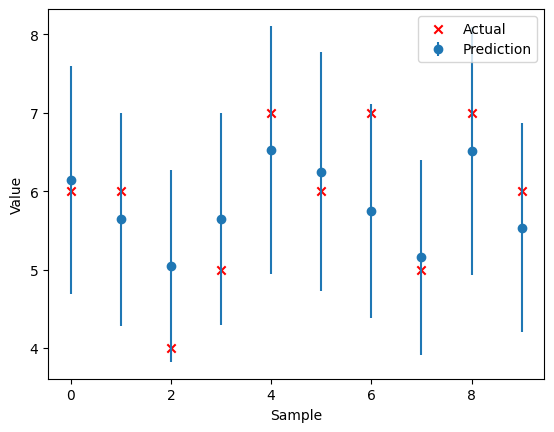

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the z-score for a 95% confidence interval
z_score = 1.96

# Compute the upper and lower bounds of the confidence interval
upper = (prediction_mean + (z_score * prediction_stdv)).flatten()[:10]
lower = (prediction_mean - (z_score * prediction_stdv)).flatten()[:10]

# Compute the errors as the differences between the upper and lower bounds
errors = np.vstack((np.asarray(prediction_mean).flatten()[:10] - lower, upper - np.asarray(prediction_mean).flatten()[:10]))

# Create a range of indices for the x-axis
indices = range(10)

# Plot the predicted values with error bars
plt.errorbar(indices, np.asarray(prediction_mean).flatten()[:10], yerr=errors, fmt='o', label='Prediction')

# Plot the actual values
plt.scatter(indices, y_test[:10], marker='x', color='red', label='Actual')

# Add labels and legend
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


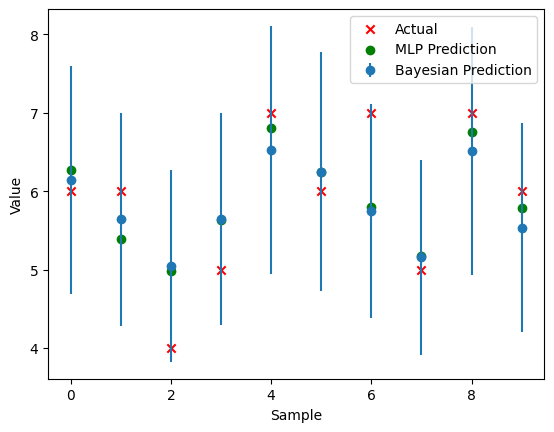

In [ ]:
# Calculate the z-score for a 95% confidence interval
z_score = 1.96

# Compute the upper and lower bounds of the confidence interval
upper = (prediction_mean + (z_score * prediction_stdv)).flatten()[:10]
lower = (prediction_mean - (z_score * prediction_stdv)).flatten()[:10]

# Compute the errors as the differences between the upper and lower bounds
errors = np.vstack((np.asarray(prediction_mean).flatten()[:10] - lower, upper - np.asarray(prediction_mean).flatten()[:10]))

# Create a range of indices for the x-axis
indices = range(10)

# Plot the predicted values with error bars
plt.errorbar(indices, np.asarray(prediction_mean).flatten()[:10], yerr=errors, fmt='o', label='Bayesian Prediction')

# Plot the actual values
plt.scatter(indices, y_test[:10], marker='x', color='red', label='Actual')

# Plot MLP predictions
plt.scatter(indices, predictions[:10], color='green', label='MLP Prediction')


# Add labels and legend
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

#### MSE of BNN

In [ ]:
# Get the MSE of the BNN
prediction_mean = np.asarray(prediction_distribution.mean().numpy().tolist()).flatten()  # Convert the prediction mean to a list if necessary
y_true = y_test # Get the ground truth value for the corresponding index

mse = np.mean((np.array(prediction_mean) - y_true) ** 2)
print('MSE: ', mse )

MSE:  0.6279381285570731


## References

https://keras.io/examples/keras_recipes/bayesian_neural_networks/